# Kazakh-British Technical University
## Introduction to Artificial Intelligence
### Seminar 12
### Feature selection



In [3]:
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Dataset

We will work with data from the Home Credit Default Risk competition, in which we were required to predict whether the client will repay the loan
https://www.kaggle.com/c/home-credit-default-risk

Let's download the data and look at it

In [4]:
application_train = pd.read_csv('application_train.csv')

In [5]:
application_train.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
155008,279672,0,Cash loans,F,N,N,0,112500.0,509922.0,48415.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
192171,322836,0,Revolving loans,M,Y,N,2,450000.0,450000.0,22500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
133167,254449,0,Revolving loans,F,N,Y,1,225000.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
33581,138901,0,Cash loans,M,Y,Y,0,180000.0,1535553.0,42354.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
57904,167115,0,Cash loans,F,Y,Y,0,180000.0,247275.0,19417.5,...,0,0,0,0,0.0,0.0,0.0,3.0,0.0,4.0


In [6]:
application_train.TARGET.value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

For convenience, we will further consider only 10% of the data.

In [7]:
from sklearn.model_selection import train_test_split

#your code
application, application_train = train_test_split(application_train, train_size=0.1)
                                 
application = application.sort_values('SK_ID_CURR').reset_index(drop=True)
application.TARGET.value_counts()

TARGET
0    28222
1     2529
Name: count, dtype: int64

In [8]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,100069,0,Cash loans,M,Y,Y,1,360000.0,640458.0,27265.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
2,100082,0,Cash loans,M,N,N,2,180000.0,450000.0,21109.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0
3,100087,0,Cash loans,F,N,Y,1,202500.0,1288350.0,37800.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100112,1,Cash loans,M,Y,Y,0,315000.0,953460.0,64107.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


application_train is a rather large table, we don’t need it further, we can delete it and collect garbage

In [9]:
del application_train
gc.collect(); #Собираем мусор

In [10]:
application.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

Let's highlight numeric and non-numeric features

In [11]:
categorical_list = []
numerical_list = []
#your code
for col in application.columns:
    if(np.dtype(application[col]) == "object"):
        categorical_list.append(col)
    else:
        numerical_list.append(col)
    

print('Number of categorical features:', len(categorical_list))
print('Number of numerical features:', len(numerical_list))

Number of categorical features: 16
Number of numerical features: 106


Let's look for missing values

In [12]:
application.isnull().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     4206
AMT_REQ_CREDIT_BUREAU_WEEK    4206
AMT_REQ_CREDIT_BUREAU_MON     4206
AMT_REQ_CREDIT_BUREAU_QRT     4206
AMT_REQ_CREDIT_BUREAU_YEAR    4206
Length: 122, dtype: int64

To replace missing values, you can use `SimpleImputer` from sklearn: this model replaces missing values (`np.nan`) in some way `strategy` (by default it replaces with the average, but you can also replace the median, the most frequent value or specified in `fill_value ` constant)

In [13]:
from sklearn.impute import SimpleImputer
application[numerical_list] = SimpleImputer(missing_values=np.nan,
                                            strategy='median').fit_transform(application[numerical_list])

In [14]:
application.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64

In [15]:
application.isnull().sum().any()

True

Now all numeric data has no gaps, but some categorical data does. Let's deal with them

In [16]:
print(application.shape)

(30751, 122)


In [17]:
application = pd.get_dummies(application, drop_first=True)
print(application.shape)

(30751, 228)


In [18]:
application.isnull().sum().any()

False

In [19]:
application.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes
0,100012.0,0.0,0.0,135000.0,405000.0,20250.0,405000.0,0.019689,-14469.0,-2019.0,...,False,False,False,False,False,False,False,False,False,False
1,100069.0,0.0,1.0,360000.0,640458.0,27265.5,517500.0,0.007330,-14186.0,-1743.0,...,False,False,False,False,False,False,False,False,False,False
2,100082.0,0.0,2.0,180000.0,450000.0,21109.5,450000.0,0.018850,-12009.0,-2844.0,...,True,False,False,False,False,False,True,False,False,False
3,100087.0,0.0,1.0,202500.0,1288350.0,37800.0,1125000.0,0.003069,-17542.0,-2011.0,...,False,False,False,False,False,False,False,False,False,False
4,100112.0,1.0,0.0,315000.0,953460.0,64107.0,900000.0,0.030755,-10199.0,-2015.0,...,False,False,False,False,False,False,False,False,False,False


In [20]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30751 entries, 0 to 30750
Columns: 228 entries, SK_ID_CURR to EMERGENCYSTATE_MODE_Yes
dtypes: bool(122), float64(106)
memory usage: 28.4 MB


Now select the target (TARGET) and delete SK_ID_CURR (Question: Why are we deleting this attribute?)

In [21]:
X = application[application.columns[2:]]
y = application.TARGET
feature_name = X.columns.tolist()

In [22]:
X.shape

(30751, 226)

Now there are 224 signs, we will try to choose the best

## One-dimensional methods

Idea: evaluate the importance of each feature separately, select the most important features

In [23]:
def feature_selector(X, y, score_function, n_features=100):
    importance_list = []
    feature_names = X.columns.to_numpy()
    # Считаем важность для каждого признака
    for i in feature_names:
        importance_list.append(score_function(X[i], y))
    # Заменяем np.nan на 0
    importance_list = [0 if np.isnan(i) else i for i in importance_list]
    # Выбрали названия признаков с наибольшей важностью
    best_features = feature_names[np.argsort(importance_list)[-n_features:]][::-1]

    return best_features

## Pearson correlation

Idea: we calculated the correlation between the feature $x^j$ and the target ($R(x^j, y)$), if the correlation is large in magnitude, then the feature is informative


$$R(x, y) = \frac{\sum_{i=1}^n(x_i - \overline{x})(y_i - \overline{y})}{\sqrt{\sum_{i=1}^n(x_i - \overline{x})^2 \sum_{i=1}^n(y_i - \overline{y})^2}}$$



In [24]:
def pearson_correlation_abs(x, y):
  return np.abs(np.corrcoef(x, y)[0, 1])

In [47]:
# я не смог написать функцию сверху, так-как каждый раз оно начинает сжирать весь ОЗУ и у меня VS Code крашится. 
# Поэтому я просто взял pearson_correlation_abs и немного поправил. 
# Если я ошибся можете отправить правильное решение.
def pearson_correlation_own(x, y):
  x_mean = np.mean(x)
  y_mean = np.mean(y)
  x_sub = np.array(x-x_mean)
  y_sub = np.array(y-y_mean)
  usti = 0
  dvoiki = np.array([2]*len(x_sub))
  a = np.power(x_sub, dvoiki)
  b = np.power(y_sub, dvoiki)
  for index in range(len(x_sub)):
    usti += x_sub[index]*y_sub[index]
  asty = np.sqrt((np.sum(a))*(np.sum(b)))
  return usti/asty

In [70]:
a1 = [1 , 2 , 3, 4 , 5, 6, 7, 8, 9, 10]
a2 = np.random.randint(0,100,10)
print(pearson_correlation_own(a1, a2))
print(pearson_correlation_abs(a1, a2))

-0.39130666286202825
0.3913066628620282


In [61]:
cor_features = feature_selector(X, y, score_function=pearson_correlation_abs)
print(str(len(cor_features)), 'selected features')

100 selected features


In [60]:
own_cor_features = feature_selector(X, y, score_function=pearson_correlation_own)
print(str(len(own_cor_features)), 'own selected features')

100 own selected features


In [42]:
am = 0
for i in cor_features:
    for j in own_cor_features:
        if (i == j):
            am += 1
            break
print(am)

34


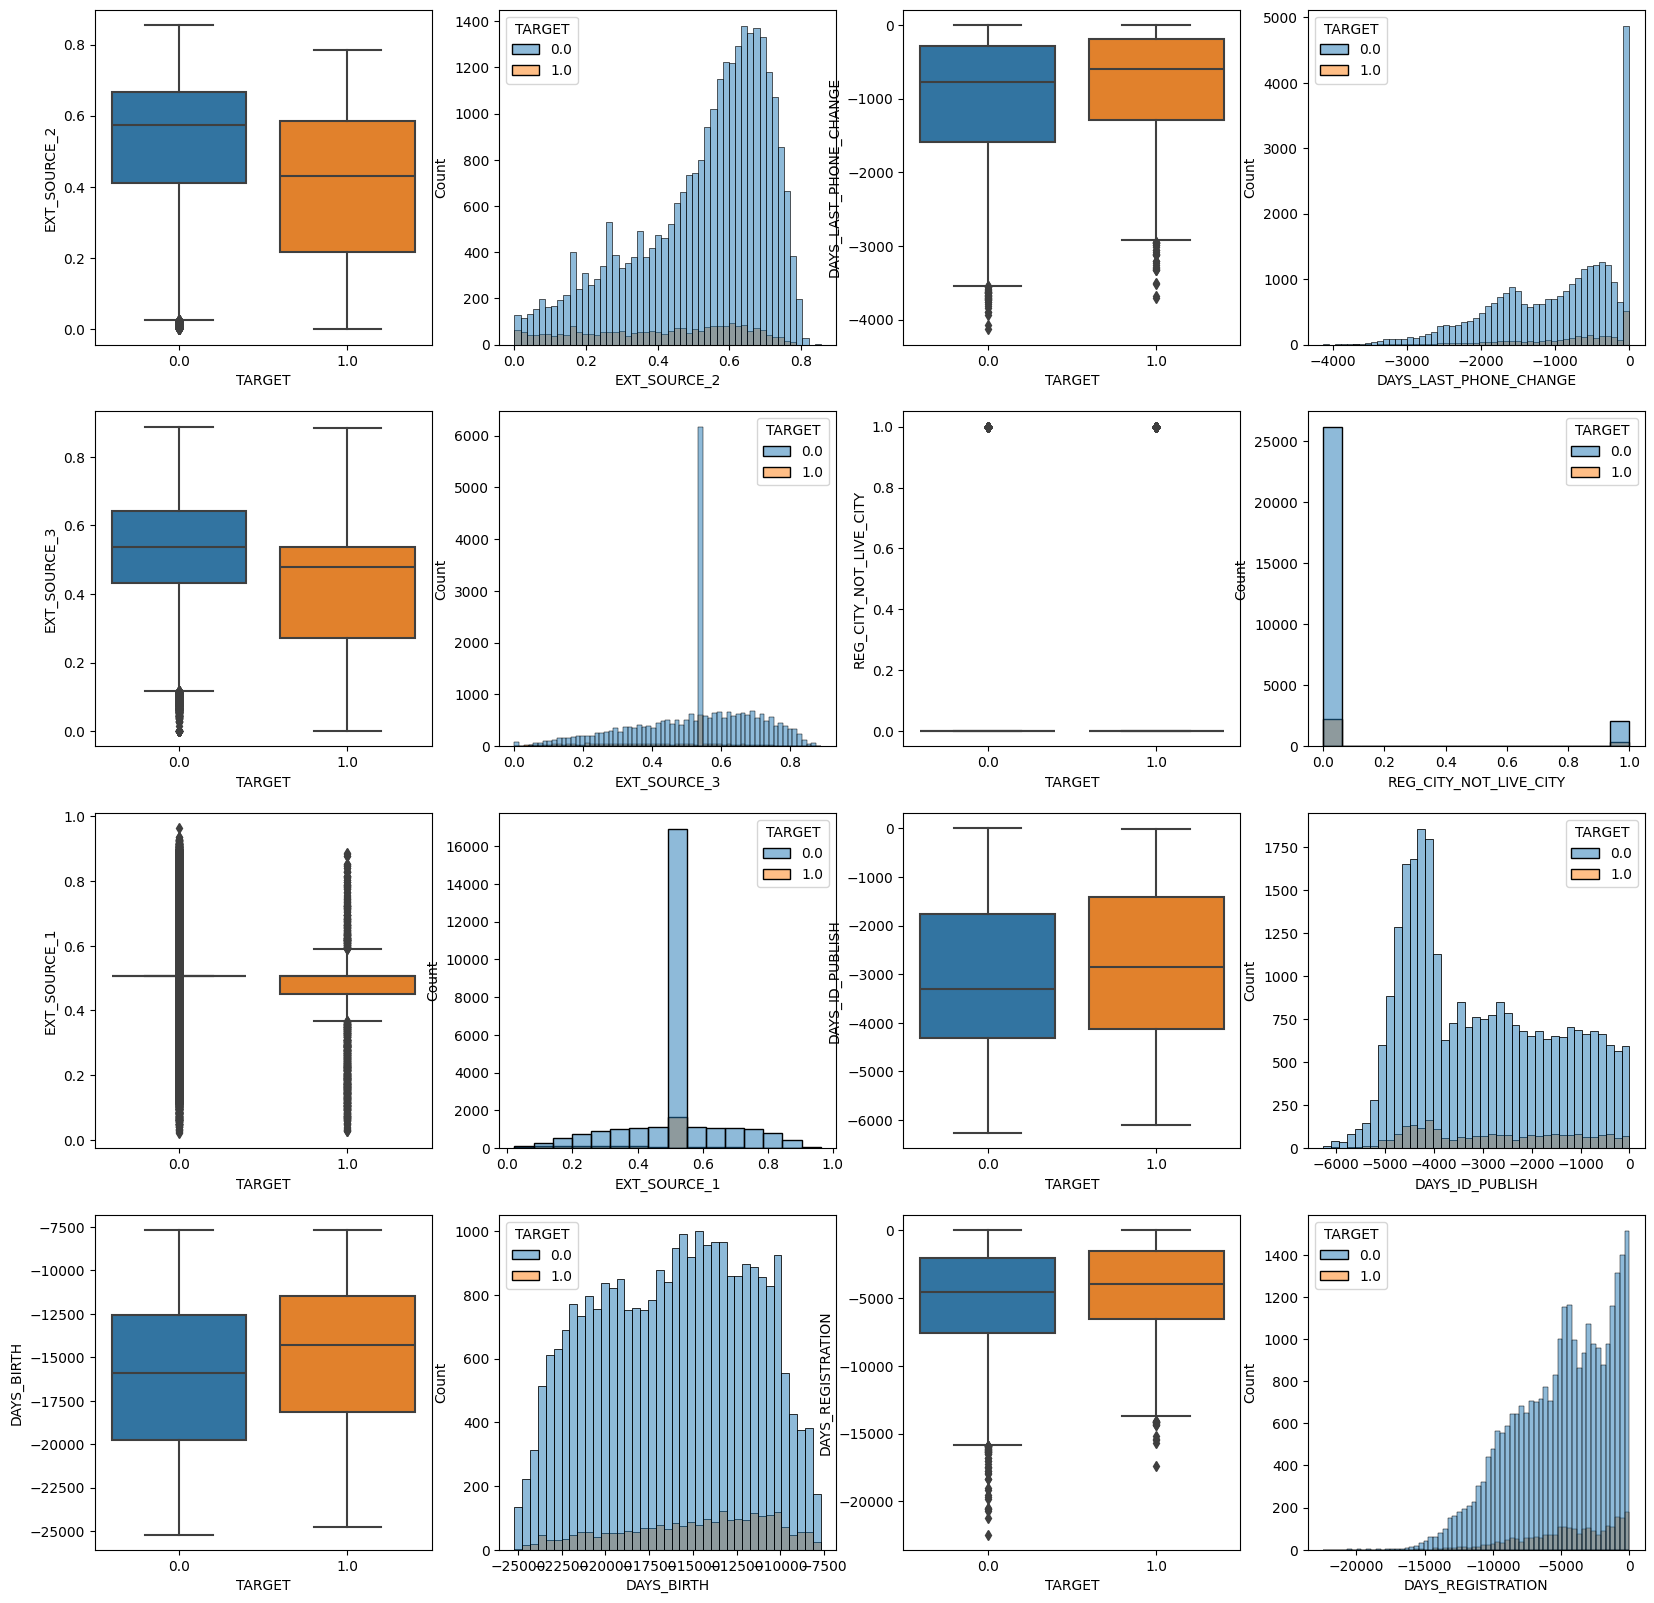

In [59]:
fig, axs = plt.subplots(figsize=(20,20), nrows=4, ncols=4)

for i in range(4):
  sns.boxplot(y=X[cor_features[i]],
               x=y,
               ax=axs[i][0])
  sns.histplot(x=X[cor_features[i]],
               hue=y,
               ax=axs[i][1])
  sns.boxplot(y=X[own_cor_features[i+6]],
               x=y,
               ax=axs[i][2])
  sns.histplot(x=X[own_cor_features[i+6]],
               hue=y,
               ax=axs[i][3])

The problem with this approach: only linear relationships are taken into account

### 2. T score

Idea: we calculated the t score of the feature $x^j$ based on the division by the target target ($R(x^j, y)$), if the t score is large, then the feature is informative


$$R(x, y) = \frac{|\mu_1 - \mu_0|}{\sqrt{\frac{\sigma_0^2}{n_0}+\frac{\sigma_1^2}{n_1}}}$$

Where $\mu_i, \sigma_i^2, n_i$ is the mean, variance and number of objects for feature $x$ of class $i$ (0 or 1)

This method is used for binary classification problems (for multi-class classification there is an F score)

In [122]:
def t_score(x, y):
    return (np.abs(np.mean(x)-np.mean(y)))/(np.sqrt(np.var(x, ddof = 1)/len(x))+np.sqrt(np.var(y, ddof = 1)/len(y)))


In [128]:
a1 = np.random.randint(0,100,10)
a2 = np.random.randint(0,100,10)
t_score(a1, a2)

0.3376366776251272

In [129]:
tscore_features = feature_selector(X, y, score_function=t_score)
print(str(len(tscore_features)), 'selected features')
print(tscore_features)

100 selected features
['DAYS_BIRTH' 'HOUR_APPR_PROCESS_START' 'FLAG_MOBIL' 'FLAG_CONT_MOBILE'
 'YEARS_BEGINEXPLUATATION_AVG' 'YEARS_BEGINEXPLUATATION_MEDI'
 'YEARS_BEGINEXPLUATATION_MODE' 'REGION_RATING_CLIENT'
 'REGION_RATING_CLIENT_W_CITY' 'YEARS_BUILD_MODE' 'DAYS_ID_PUBLISH'
 'YEARS_BUILD_MEDI' 'YEARS_BUILD_AVG' 'AMT_ANNUITY' 'CNT_FAM_MEMBERS'
 'AMT_CREDIT' 'AMT_GOODS_PRICE' 'DAYS_REGISTRATION'
 'NAME_HOUSING_TYPE_House / apartment' 'OWN_CAR_AGE' 'AMT_INCOME_TOTAL'
 'DAYS_LAST_PHONE_CHANGE' 'FLAG_EMP_PHONE' 'NAME_TYPE_SUITE_Unaccompanied'
 'EXT_SOURCE_1' 'EXT_SOURCE_3' 'EXT_SOURCE_2'
 'NAME_EDUCATION_TYPE_Secondary / secondary special' 'FLAG_DOCUMENT_3'
 'AMT_REQ_CREDIT_BUREAU_YEAR' 'FLAG_OWN_REALTY_Y'
 'NAME_FAMILY_STATUS_Married' 'NAME_INCOME_TYPE_Working'
 'OBS_30_CNT_SOCIAL_CIRCLE' 'OBS_60_CNT_SOCIAL_CIRCLE' 'DAYS_EMPLOYED'
 'FLOORSMIN_AVG' 'FLOORSMIN_MEDI' 'FLOORSMIN_MODE' 'CODE_GENDER_M'
 'FLAG_OWN_CAR_Y' 'CNT_CHILDREN' 'FLOORSMAX_AVG' 'FLOORSMAX_MEDI'
 'FLAG_DOCUMENT_4' 'FLOO

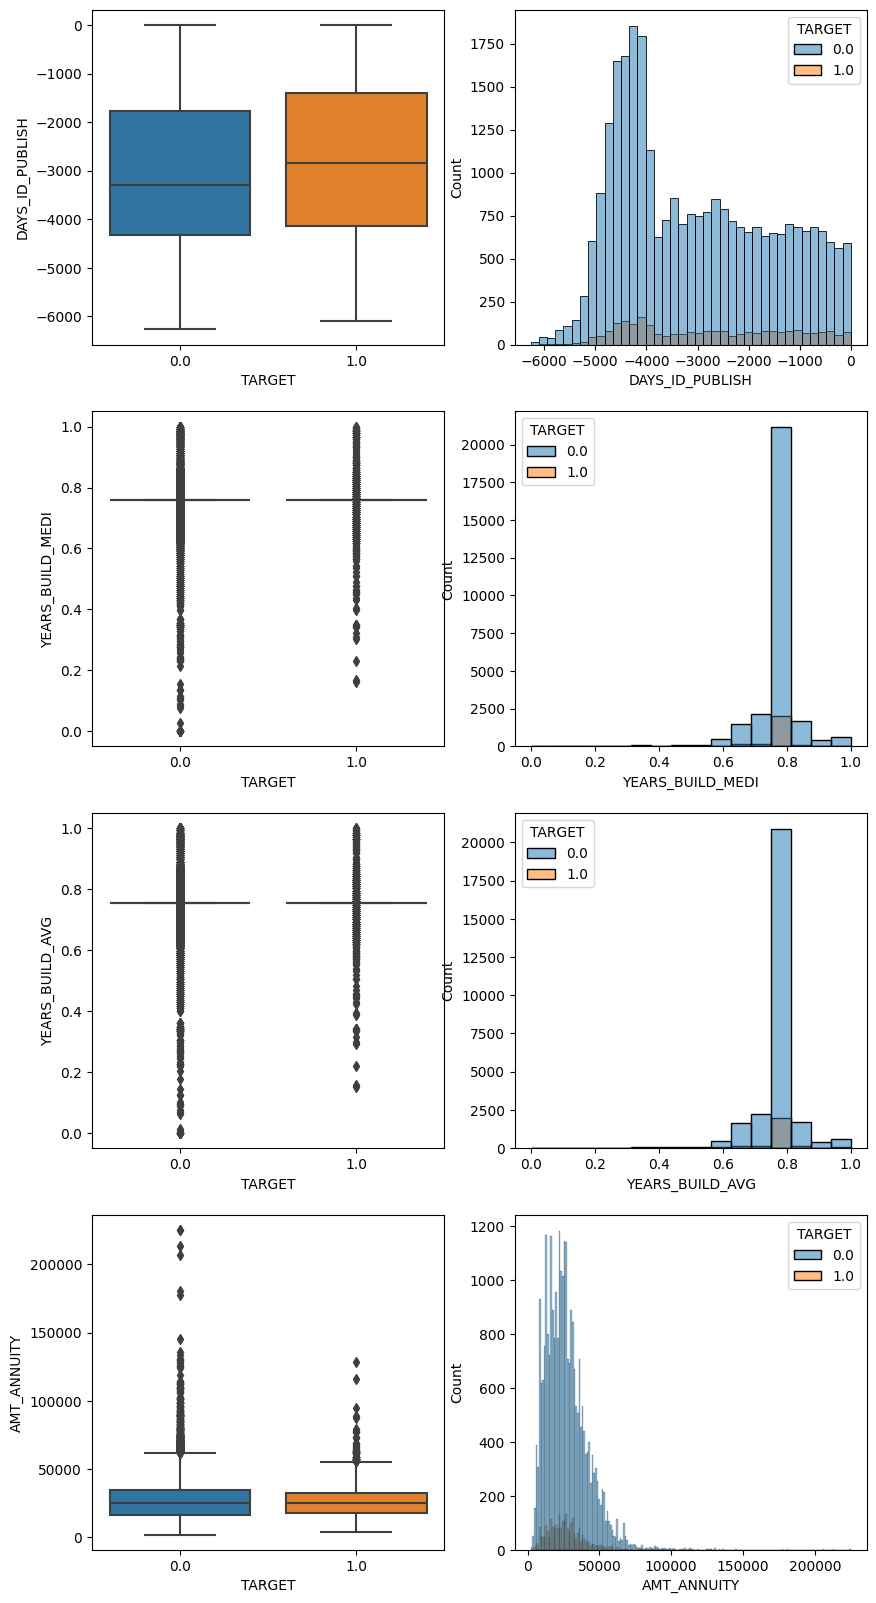

In [134]:
fig, axs = plt.subplots(figsize=(10,20), nrows=4, ncols=2)

for i in range(4):
  sns.boxplot(y=X[tscore_features[i+10]],
               x=y,
               ax=axs[i][0])
  sns.histplot(x=X[tscore_features[i+10]],
               hue=y,
               ax=axs[i][1])

In [135]:
set(cor_features) == set(tscore_features)

False

The main problem of one-dimensional methods is that they do not work if the target variable depends on a set of characteristics

## Wrapper methods

Idea: Evaluate subsets of features, making it possible to detect possible relationships between a set of features

*RFE*(Recursive Feature Elimination) - is trained on an initial set of features, and the importance of each feature is obtained either through the `coef_` attribute or through the `feature_importances_` attribute of the model specified in `estimator`.

Then `step` the least important features are removed. This procedure is repeated recursively until `n_features_to_select` features are eventually reached.

In [136]:
from sklearn.preprocessing import StandardScaler
X_norm = StandardScaler().fit_transform(X)

In [137]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=100, step=10, verbose=5)
rfe_selector.fit(X_norm, y)

Fitting estimator with 226 features.
Fitting estimator with 216 features.
Fitting estimator with 206 features.
Fitting estimator with 196 features.
Fitting estimator with 186 features.
Fitting estimator with 176 features.
Fitting estimator with 166 features.
Fitting estimator with 156 features.
Fitting estimator with 146 features.
Fitting estimator with 136 features.
Fitting estimator with 126 features.
Fitting estimator with 116 features.
Fitting estimator with 106 features.


RFE(estimator=LogisticRegression(), n_features_to_select=100, step=10,
    verbose=5)

In [138]:
rfe_support = rfe_selector.get_support() #Получаем маску True/False для признаков
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

100 selected features


The main problem is computationally expensive

## Built-in methods (Embedded)

The idea of `SelectFromModel`: the importance of features is calculated through the `estimator`. If the importance is less than the threshold value, the feature is removed. The threshold value is set by the `threshold` parameter - you can set it as a number or specify a heuristic: “mean”, “median”, you can additionally add a fraction (“0.1*mean”)

In [139]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(estimator=LogisticRegression(penalty="l2"), threshold='1.25*median')
embeded_lr_selector.fit(X_norm, y)

SelectFromModel(estimator=LogisticRegression(), threshold='1.25*median')

In [141]:
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

94 selected features


### Random Forest

For some models, the importance of features is the `coef_` attribute (Question: can you give examples?), but forest does not have such an attribute (Question: why?)


The forest has an attribute `feature_importances_` - the importance of a feature is calculated as the normalized sum of criterion decreases across all trees, across all vertices where there was a partition based on this feature.

Decrease criterion = $H(X_m) - \frac{|X_l|}{|X_m|} H(X_l) - \frac{|X_r|}{|X_m|} H(X_r)$



In [49]:
from sklearn.ensemble import RandomForestClassifier

#your code

RandomForestClassifier()

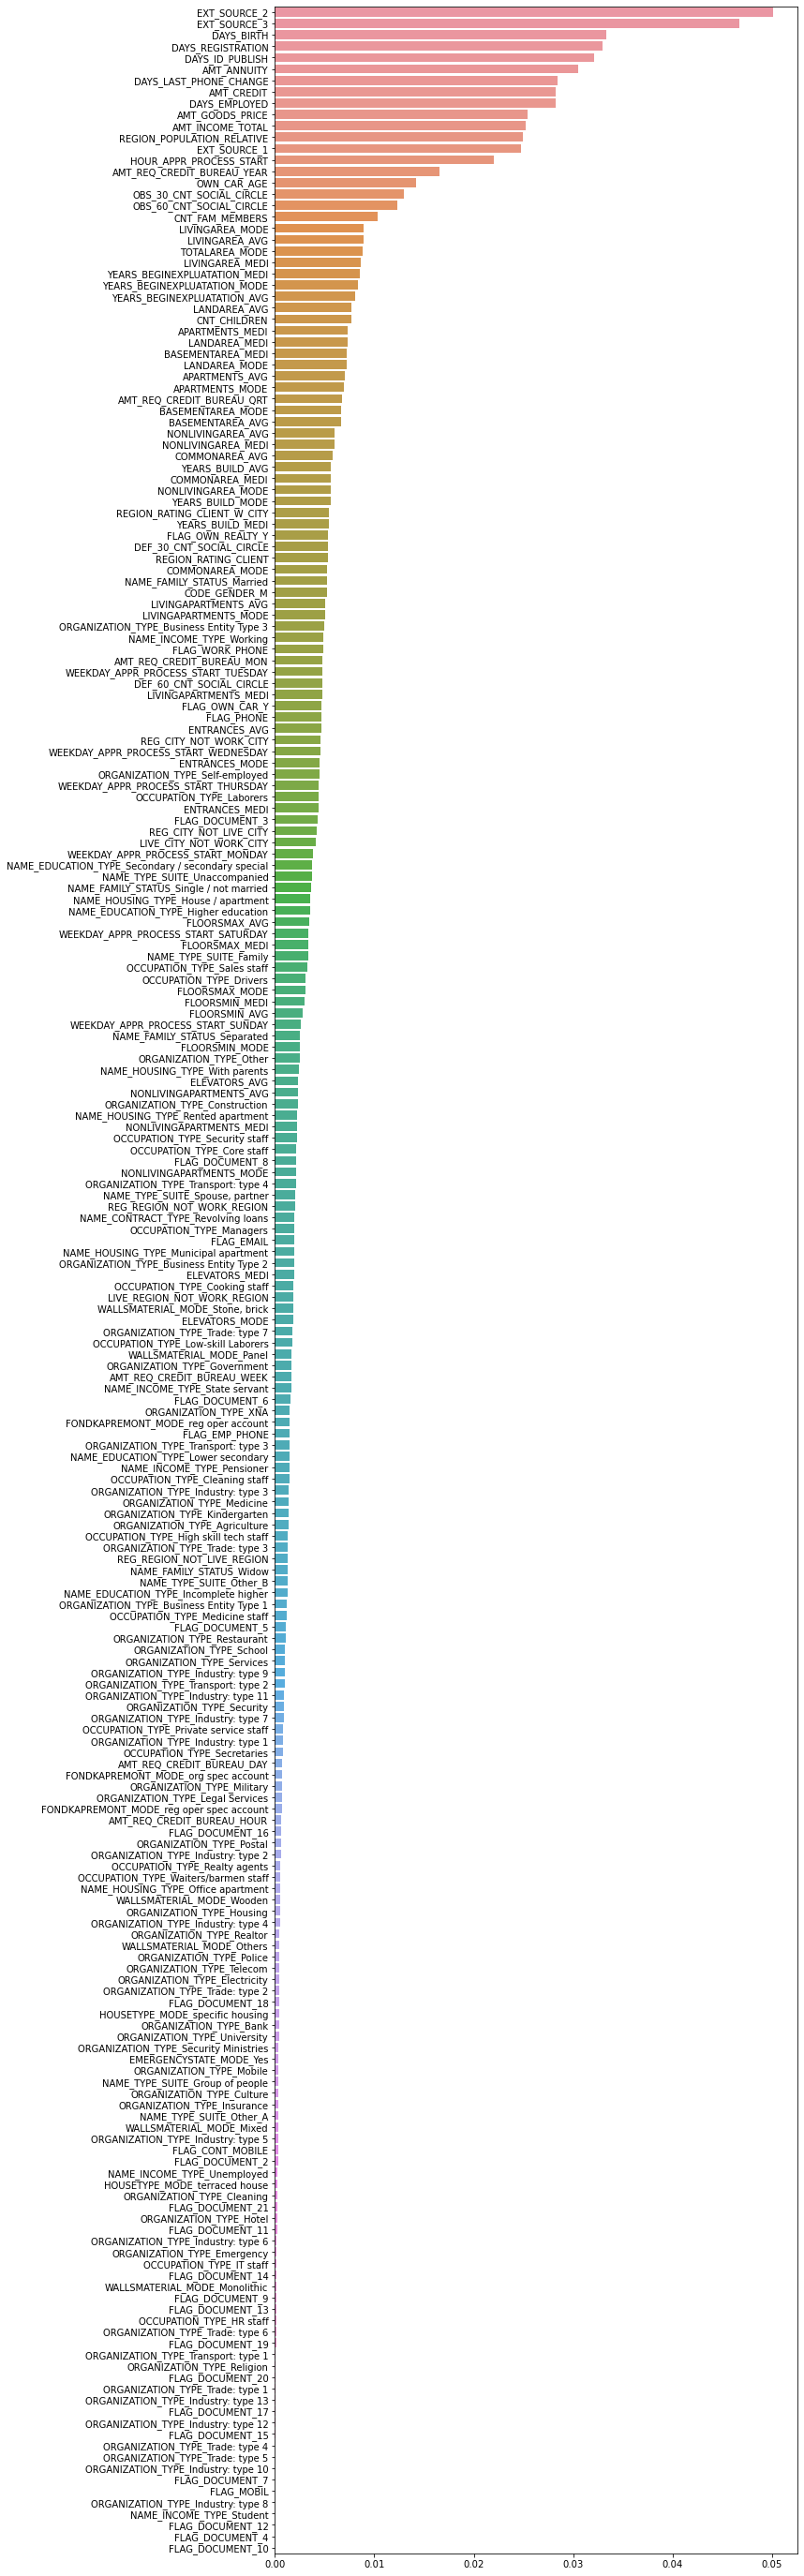

In [50]:
plot = sns.barplot(y=feature_name,
                   x=clf.feature_importances_,
                   order=np.array(feature_name)[np.argsort(clf.feature_importances_)][::-1]
                   )
plot.figure.set_size_inches(10, 50)

Apply `SelectFromModel` to `RandomForestClassifier`

In [142]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100),
                                      threshold='1.25*median')
embeded_rf_selector.fit(X, y)

KeyboardInterrupt: 

In [52]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

94 selected features
